<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Tinnitus_Only_Gap_random_2023_09_21_Random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/Publications/Titinus_ALR/Data/Tinnitus_ALR_EEG_2023.09.17_OnlyGap_No_n0p1p3.csv")

#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus/Tinnitus_106 feature_ALR_EEG_2023.02.08_OnlyGap_No_n0p1p3.csv")

dataset = pd.read_csv("/content/Tinnitus_ALR_EEG_2023.09.17_OnlyGap_No_n0p1p3.csv")

classes = np.array(sorted(list(set(dataset.iloc[:, 0]))))
result = {}

In [2]:
set(list(dataset['SubjectTypeClass']))

{'Control', 'Tinnitus'}

In [3]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 0]=encoder.fit_transform(dataset.iloc[:, 0])

<ipython-input-3-a1565ed65f65>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, 0]=encoder.fit_transform(dataset.iloc[:, 0])


In [4]:
set(list(dataset['SubjectTypeClass']))

{0, 1}

In [5]:
X = dataset.iloc[:,4:]
y = dataset.iloc[:, 0]
col=list(dataset.iloc[0:0,4:])

In [6]:
X

,n1_gap_peak_amp_20ms,p2_gap_peak_amp_20ms,n2_gap_peak_amp_20ms,n1p2_gap_diff_20ms,p2n2_gap_diff_20ms,n1p2_gap_nogap_diff_20ms,p2n2_gap_nogap_diff_20ms,p2n2_gap_no_gap_ratio_20ms,n1p2_gap_no_gap_ratio_age-norm_20ms,gap_auc_n1p2_LO_20ms,...,gamma_freq_50ms,alpha_auc_50ms,beta_auc_50ms,gamma_auc_50ms,total_auc_50ms,alpha_peak_auc_50ms,beta_peak_auc_50ms,gamma_peak_auc_50ms,ABR_peak_auc_50ms,ABR_auc_50ms
0,-1.727546,5.836355,-4.881017,7.563901,10.717372,8.369710,7.853131,0.577118,0.621010,-149.869475,...,33.935547,16.113375,10.274986,2.158507,67.336208,2.009818,0.886997,0.136649,2.265867,1.568214
1,-4.154330,4.151760,-3.249578,8.306090,7.401337,5.220658,5.663768,0.566497,0.817921,-336.160213,...,33.447266,10.661568,11.481660,2.442587,68.082027,1.106065,0.794547,0.106840,1.392070,0.928574
2,-6.014849,5.606836,-5.371053,11.621685,10.977889,4.506194,2.911799,1.360993,2.146239,-483.825623,...,34.667969,12.861917,5.695109,1.288528,53.798122,1.803541,0.481627,0.067608,3.744687,2.258415
3,2.425703,4.400682,-0.249103,1.974979,4.649785,1.609129,2.992313,2.805348,0.720855,-28.056854,...,36.376953,6.525925,4.622184,1.672584,27.156334,0.771864,0.334392,0.066847,2.308262,1.411870
4,1.858904,4.477994,-0.890925,2.619090,5.368919,4.029685,1.383470,0.795114,0.519970,-57.132022,...,33.935547,13.086656,9.183723,2.066551,48.711556,1.453007,0.506619,0.092683,2.868045,1.424984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,-3.855631,3.653126,-4.079770,7.508757,7.732897,5.209661,2.226561,0.776438,0.694646,-196.639313,...,37.109375,11.308998,5.143341,1.649774,57.163762,1.553256,0.417663,0.076762,3.718924,2.198765
157,-4.537613,0.927524,-3.162731,5.465137,4.090255,0.458985,2.669300,0.605107,1.121538,-228.345304,...,33.447266,15.200903,7.448250,1.914481,44.816896,1.735859,0.698173,0.120093,2.486287,2.040869
158,-3.294654,5.057586,-8.613345,8.352240,13.670931,2.627440,0.505249,1.038376,0.928665,-365.039102,...,32.958984,10.527679,7.359182,2.143879,44.602376,1.192989,0.538087,0.149676,2.217094,1.430550
159,-6.648611,-4.567825,-6.701626,2.080786,2.133801,0.040444,3.396425,0.385843,1.149541,-25.829706,...,33.447266,19.582825,15.136677,5.453864,93.251043,1.763572,1.170754,0.351872,1.506355,1.293733


#Feature Selection

# **Filter Method**

You can remove it. I added for not to input all the features for every runtime

In [7]:
from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']

In [8]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 10


In [9]:
imp=featureScores1.nlargest(number_of_feat,'Score')
print(imp)

                           Specs      Score
35            p2n2_gap_diff_50ms  31.171847
32          p2_gap_peak_amp_50ms  30.376211
46  gap_auc_n1p2n2_by_total_50ms  18.508664
15  gap_auc_n1p2n2_by_total_20ms  18.453713
4             p2n2_gap_diff_20ms  16.612963
2           n2_gap_peak_amp_20ms  14.296044
43           gap_auc_n1p2n2_50ms  12.021587
34            n1p2_gap_diff_50ms  11.822335
11          gap_auc_p2n2_UP_20ms  10.375489
12           gap_auc_n1p2n2_20ms   9.351984


In [10]:
list_of_feat1=[]

for i in range(number_of_feat):
  list_of_feat1.append(imp.iloc[:,0:].values[i][0])

# **Manual Features**

In [11]:
list_of_feat2=[

'p2n2_gap_diff_50ms',
'p2_gap_peak_amp_50ms',
'p2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'n1_gap_peak_amp_50ms',
'n2_gap_peak_amp_20ms',
'n1p2_gap_no_gap_ratio_age-norm_20ms',
'n1p2_gap_diff_50ms',
'gamma_freq_20ms',
'total_auc_50ms',
'gap_auc_p2n2_UP_20ms',
'gap_auc_n1p2_UP_50ms',
'gap_auc_n1p2_LO_50ms',
'n1p2_gap_diff_20ms',
'gap_auc_p2n2_UP_50ms',
'ABR_peak_auc_50ms'

    ]

print(len(list_of_feat2))

16


In [12]:
list_of_feat3=[
'p2_gap_peak_amp_50ms',
'p2n2_gap_diff_20ms',
'p2n2_gap_diff_50ms',
'n2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_by_total_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'n1p2_gap_no_gap_ratio_age-norm_50ms',
'gap_auc_p2n2_UP_20ms',
'gap_auc_p2n2_UP_50ms',
'gap_auc_n1p2n2_20ms',
'n1p2_gap_diff_50ms',
'n1p2_gap_diff_20ms',
'gap_auc_total_abs_20ms',
'n1p2_gap_no_gap_ratio_age-norm_20ms',
'alpha_peak_auc_50ms',
'ABR_peak_auc_50ms'
    ]

print(len(list_of_feat3))

16


In [13]:
X_new = dataset[list_of_feat3]
y_new = dataset.iloc[:, 0]

## Data Partition

In [14]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.18, random_state = 0)

In [15]:
'''
X_train=X_new.iloc[:134,:]
X_test=X_new.iloc[134:,:]
y_train=y_new.iloc[:134]
y_test=y_new.iloc[134:]
'''

'\nX_train=X_new.iloc[:134,:]\nX_test=X_new.iloc[134:,:]\ny_train=y_new.iloc[:134]\ny_test=y_new.iloc[134:]\n'

In [16]:
X_train

,p2_gap_peak_amp_50ms,p2n2_gap_diff_20ms,p2n2_gap_diff_50ms,n2_gap_peak_amp_20ms,gap_auc_n1p2n2_by_total_20ms,gap_auc_n1p2n2_by_total_50ms,n1p2_gap_no_gap_ratio_age-norm_50ms,gap_auc_p2n2_UP_20ms,gap_auc_p2n2_UP_50ms,gap_auc_n1p2n2_20ms,n1p2_gap_diff_50ms,n1p2_gap_diff_20ms,gap_auc_total_abs_20ms,n1p2_gap_no_gap_ratio_age-norm_20ms,alpha_peak_auc_50ms,ABR_peak_auc_50ms
122,-2.786349,5.990839,5.783785,-4.761924,0.341539,0.046901,0.858741,230.008346,74.006474,331.546958,5.777438,4.938527,970.742746,0.668565,1.265346,2.334909
136,2.200802,7.318907,8.113459,-2.445790,0.579474,0.716823,1.078627,310.411894,336.375159,658.536217,5.897585,7.317077,1136.436947,1.014482,1.226877,2.096750
24,0.920700,3.909864,3.416225,-1.916544,0.346665,0.533724,1.774603,210.079377,176.217397,283.058373,3.783358,3.537622,816.517578,0.670040,0.748886,2.683646
54,5.399308,13.223041,7.361188,-9.339847,0.619837,0.540253,0.816904,775.573875,374.041166,917.103408,7.566399,6.714019,1479.588686,0.369307,1.446727,1.913602
80,4.713998,11.952961,8.926082,-0.089925,0.370425,0.393139,5.779473,426.263069,276.421970,703.388032,11.978074,11.458102,1898.866892,1.504517,1.508490,1.541930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.472084,7.407543,3.597972,-4.442850,0.534379,0.433375,0.914518,388.320909,141.223820,601.042666,3.966626,7.272853,1124.749905,0.955461,0.518689,0.509873
103,8.483740,8.226764,15.759742,-4.040609,0.455163,0.429241,2.881604,404.670966,666.645335,872.970463,16.764859,9.011357,1917.929347,1.309073,1.052289,0.593923
67,4.087279,5.048891,5.563662,-2.824787,0.679707,0.707721,1.389568,429.247218,385.211028,689.028368,4.833955,4.083103,1013.713078,0.946295,1.566304,4.806374
117,1.042595,5.547944,3.847664,-1.726754,0.511824,0.486621,1.402077,298.235880,415.179550,511.397077,3.535623,6.022698,999.165633,1.101462,0.867842,2.322845


In [17]:
X_test

,p2_gap_peak_amp_50ms,p2n2_gap_diff_20ms,p2n2_gap_diff_50ms,n2_gap_peak_amp_20ms,gap_auc_n1p2n2_by_total_20ms,gap_auc_n1p2n2_by_total_50ms,n1p2_gap_no_gap_ratio_age-norm_50ms,gap_auc_p2n2_UP_20ms,gap_auc_p2n2_UP_50ms,gap_auc_n1p2n2_20ms,n1p2_gap_diff_50ms,n1p2_gap_diff_20ms,gap_auc_total_abs_20ms,n1p2_gap_no_gap_ratio_age-norm_20ms,alpha_peak_auc_50ms,ABR_peak_auc_50ms
111,0.690389,3.800128,4.082925,0.064270,0.132768,0.178438,1.154154,70.533732,73.177895,70.533732,3.730857,3.506730,531.255460,0.786123,1.104941,2.319719
113,-0.427158,3.988710,1.977989,-0.545046,0.346616,0.197489,0.366871,205.774508,74.703335,305.359084,2.003310,3.469627,880.973402,0.697134,0.326030,0.921638
144,5.197150,8.923066,9.429368,-5.207142,0.508176,0.498320,1.069205,344.959873,326.796984,590.673295,8.843393,7.920367,1162.339576,1.334647,0.896689,1.305909
7,1.765721,3.719307,2.658478,-1.389671,0.732963,0.287170,0.257611,316.024866,116.921488,369.374156,1.028946,1.928910,503.946223,0.552476,1.024133,2.152012
44,5.097254,11.359348,12.250938,-6.710666,0.508566,0.629036,1.251865,555.388569,532.036667,893.362158,6.973567,8.631972,1756.628563,1.338533,1.967940,1.585120
106,2.591517,2.929887,6.065540,0.436728,0.346563,0.333263,0.891204,224.046489,284.316606,411.922552,6.363046,3.503313,1188.592268,0.515981,1.774240,1.598264
123,-0.566451,7.092827,5.452052,-6.372629,0.578430,0.378466,1.743665,481.470033,500.887636,815.229958,6.134188,5.302187,1409.384308,0.878587,1.874692,3.001422
66,4.696806,7.777379,10.042519,-4.291509,0.586550,0.511440,1.076391,426.602416,390.496703,581.045063,5.611237,6.233918,990.615277,1.402988,0.865133,1.004169
85,-2.439717,6.970063,4.511942,-6.316816,0.274969,0.077834,0.682834,246.629339,74.621310,246.629339,4.555686,4.345025,896.933646,0.789536,2.416072,3.148942
86,4.842907,5.538156,5.619215,-1.040912,0.529119,0.442299,1.550768,242.436736,139.134678,430.849524,7.400787,4.619306,814.277751,1.060598,1.785098,3.183493


###ANOVA with f classifciation

In [18]:


from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA']

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])
selection_method = "ANOVA"

#ADABOOST

In [19]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[13  3]
 [ 5  8]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.73      0.62      0.67        13

    accuracy                           0.72        29
   macro avg       0.72      0.71      0.72        29
weighted avg       0.72      0.72      0.72        29

Accurecy:  0.7241379310344828


1/200 round completed......................... Accurecy: 0.7586206896551724
2/200 round completed......................... Accurecy: 0.7586206896551724
3/200 round completed......................... Accurecy: 0.8275862068965517
4/200 round completed......................... Accurecy: 0.7586206896551724
5/200 round completed......................... Accurecy: 0.8620689655172413
6/200 round completed......................... Accurecy: 0.8620689655172413
7/200 round completed......................... Accurecy: 0.896551724137931
8/200 round completed......................... Accurecy: 0.896551724137931
9/200 round completed......................... Accurecy: 0.8275862068965517
10/200 round completed......................... Accurecy: 0.8275862068965517
11/200 round completed......................... Accurecy: 0.8620689655172413
12/200 round completed......................... Accurecy: 0.8620689655172413
13/200 round completed......................... Accurecy: 0.6896551724137931
14/200 rou

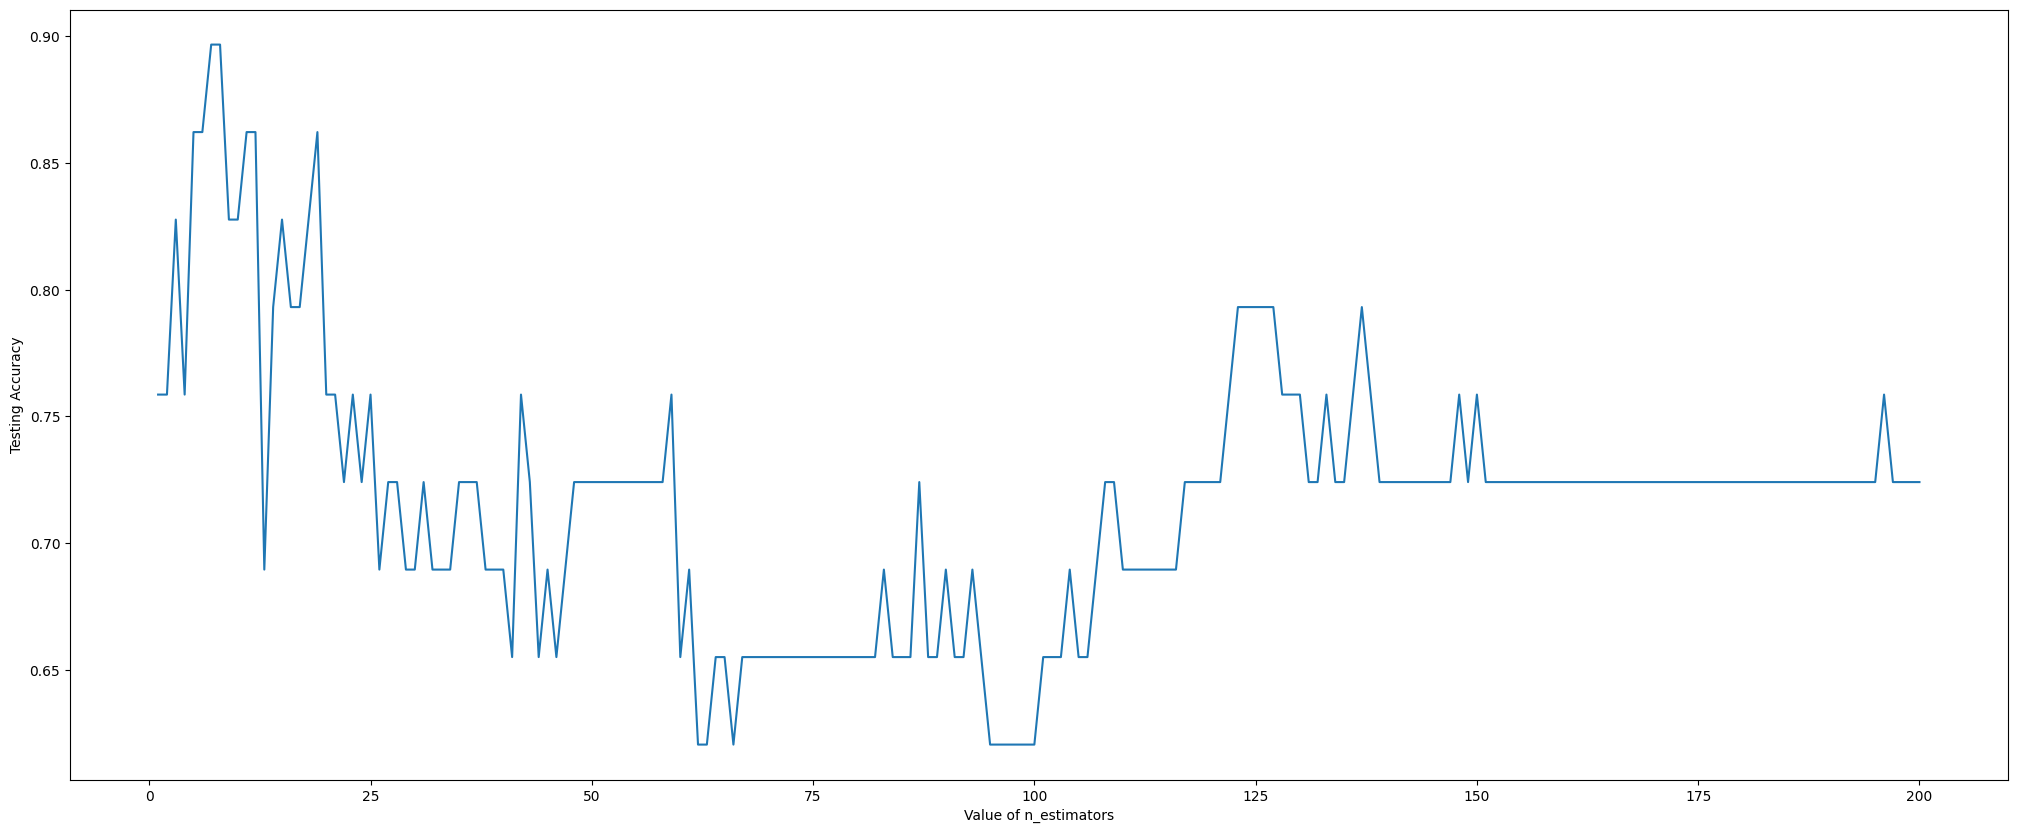

In [20]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[15  1]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.92      0.85      0.88        13

    accuracy                           0.90        29
   macro avg       0.90      0.89      0.89        29
weighted avg       0.90      0.90      0.90        29

Accurecy:  0.896551724137931




---



---



#Graddient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[13  3]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.79      0.85      0.81        13

    accuracy                           0.83        29
   macro avg       0.83      0.83      0.83        29
weighted avg       0.83      0.83      0.83        29

Accurecy:  0.8275862068965517


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.7586206896551724
2/150 round completed......................... Accurecy: 0.7931034482758621
3/150 round completed......................... Accurecy: 0.8275862068965517
4/150 round completed......................... Accurecy: 0.8275862068965517
5/150 round completed......................... Accurecy: 0.8275862068965517
6/150 round completed......................... Accurecy: 0.8275862068965517
7/150 round completed......................... Accurecy: 0.8275862068965517
8/150 round completed......................... Accurecy: 0.8275862068965517
9/150 round completed......................... Accurecy: 0.8275862068965517
10/150 round completed......................... Accurecy: 0.7931034482758621
11/150 round completed......................... Accurecy: 0.7931034482758621
12/150 round completed......................... Accurecy: 0.8275862068965517
13/150 round completed......................... Accurecy: 0.8275862068965517
14/150 r

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)



---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)



---



---



#XGB

In [ ]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

#Histogram-Based Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hisgradBoost_default = HistGradientBoostingClassifier(random_state=0)
hisgradBoost_default.fit(X_train, y_train)
y_pred = hisgradBoost_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_default,7,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=1000
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_iter:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_depth:")
max_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(max_depth)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_iter = HistGradientBoostingClassifier(max_iter=best_estimator,random_state=0)
hisgradBoost_max_iter.fit(X_train, y_train)
y_pred = hisgradBoost_max_iter.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_iter,8,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_depth = HistGradientBoostingClassifier(max_depth=max_depth,random_state=0)
hisgradBoost_max_depth.fit(X_train, y_train)
y_pred = hisgradBoost_max_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_depth,9,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=max_depth,random_state=0)
hisgradBoost_all.fit(X_train, y_train)
y_pred = hisgradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_all,10,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

#Result

In [ ]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()

In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


In [ ]:
print("best_models:")
for i in best_models:
  print(i)


In [ ]:
len(best_models)

#Testing Accuracy For Best 4 Models

In [ ]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

#SHAP

In [ ]:
!pip install shap
import shap

In [ ]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_train)

  shap_values1 = explainer(X_train)
  features_names=list_of_feat1

  if 'Subjects' in features_names:
    features_names.pop(0)

  print("Global Explaination")
  shap.plots.bar(shap_values1,max_display=30)

  print("Global Explaination")

  shap.summary_plot(shap_values1,max_display=30)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=25)


  print("Local Explaination")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=25)

**Model Check Box Function**

In [ ]:

def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

In [ ]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=52, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=52, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

In [ ]:
graph_feat={
    "max_display":30,
    "shap_values Index":10
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=52, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=52, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes, percent=True)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=52, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=52, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

In [ ]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Tinnitus'
  return my_list

In [ ]:
new_keys_4=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=52, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=52, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

In [ ]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")

#ROC Comparaing Machine Learning Models

In [ ]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i])

  # Title
  plt.title('ROC Plot Testing',fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])

  plt.legend(
           prop = {'size' : graph_feat["legend Font Size"]},
           loc = graph_feat["legend Position"])
  plt.xticks(fontsize=20, weight = 'bold')
  plt.yticks(fontsize=20, weight = 'bold')
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [ ]:
new_keys_2=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=52, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=52, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)


Change  the given dictionary of graph feature for desire graph.

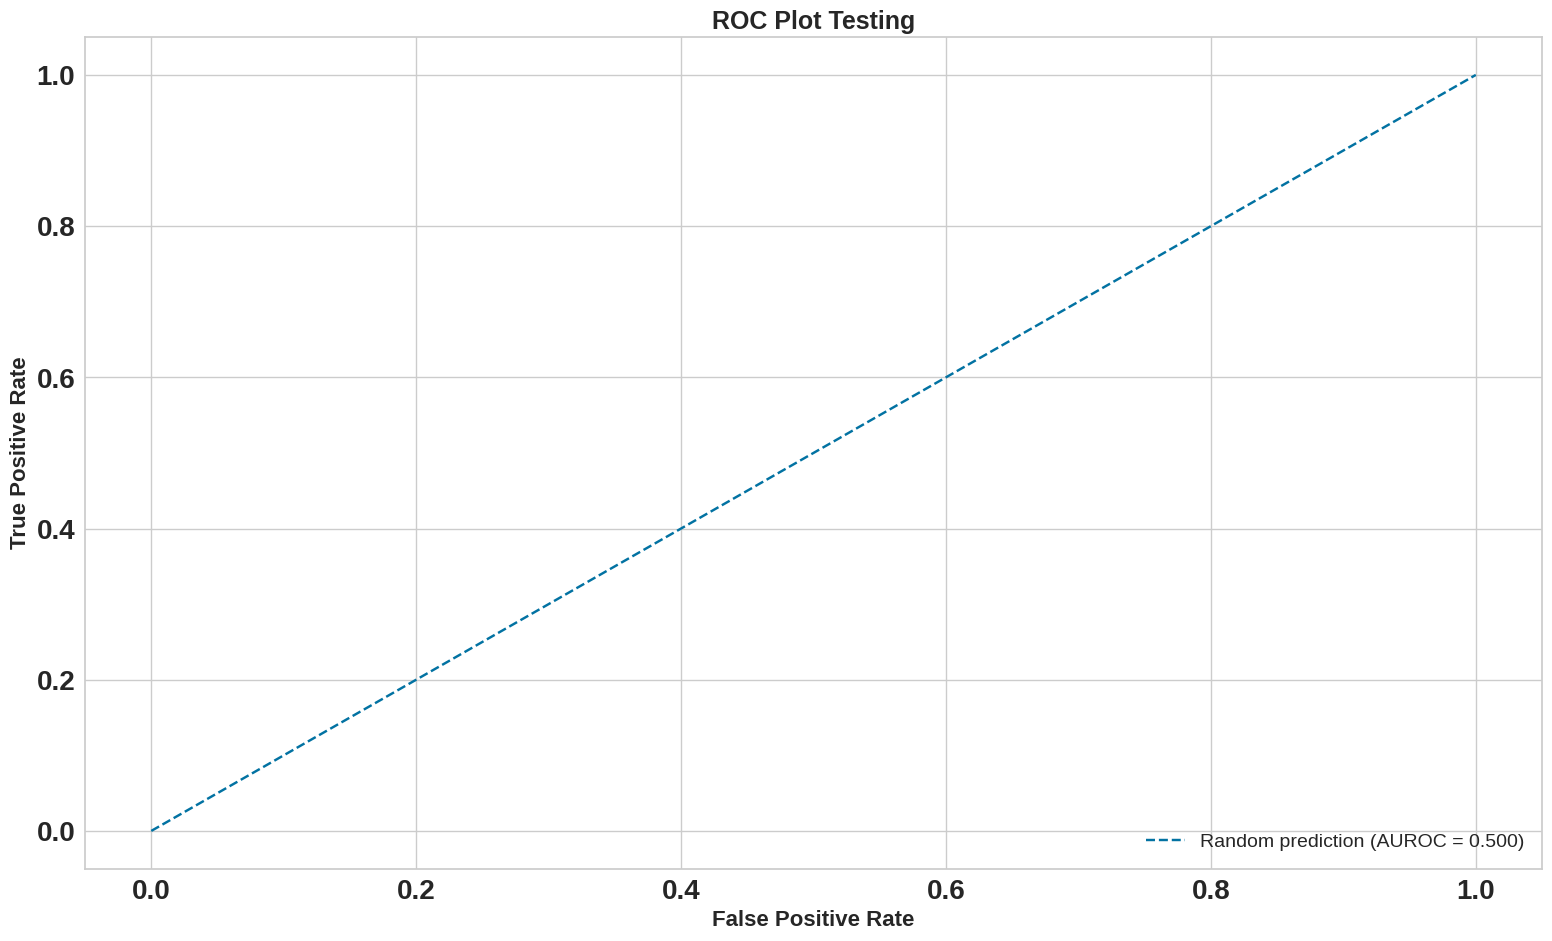

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_training.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])

ROC(mod,X_train,y_train,graph_feat)



---



***Testing ROC***<br>
Chosse the Models

In [ ]:
new_keys_3=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=7, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=52, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=10, n_estimators=52, random_state=0)', ind…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)


Change  the given dictionary of graph feature for desire graph.

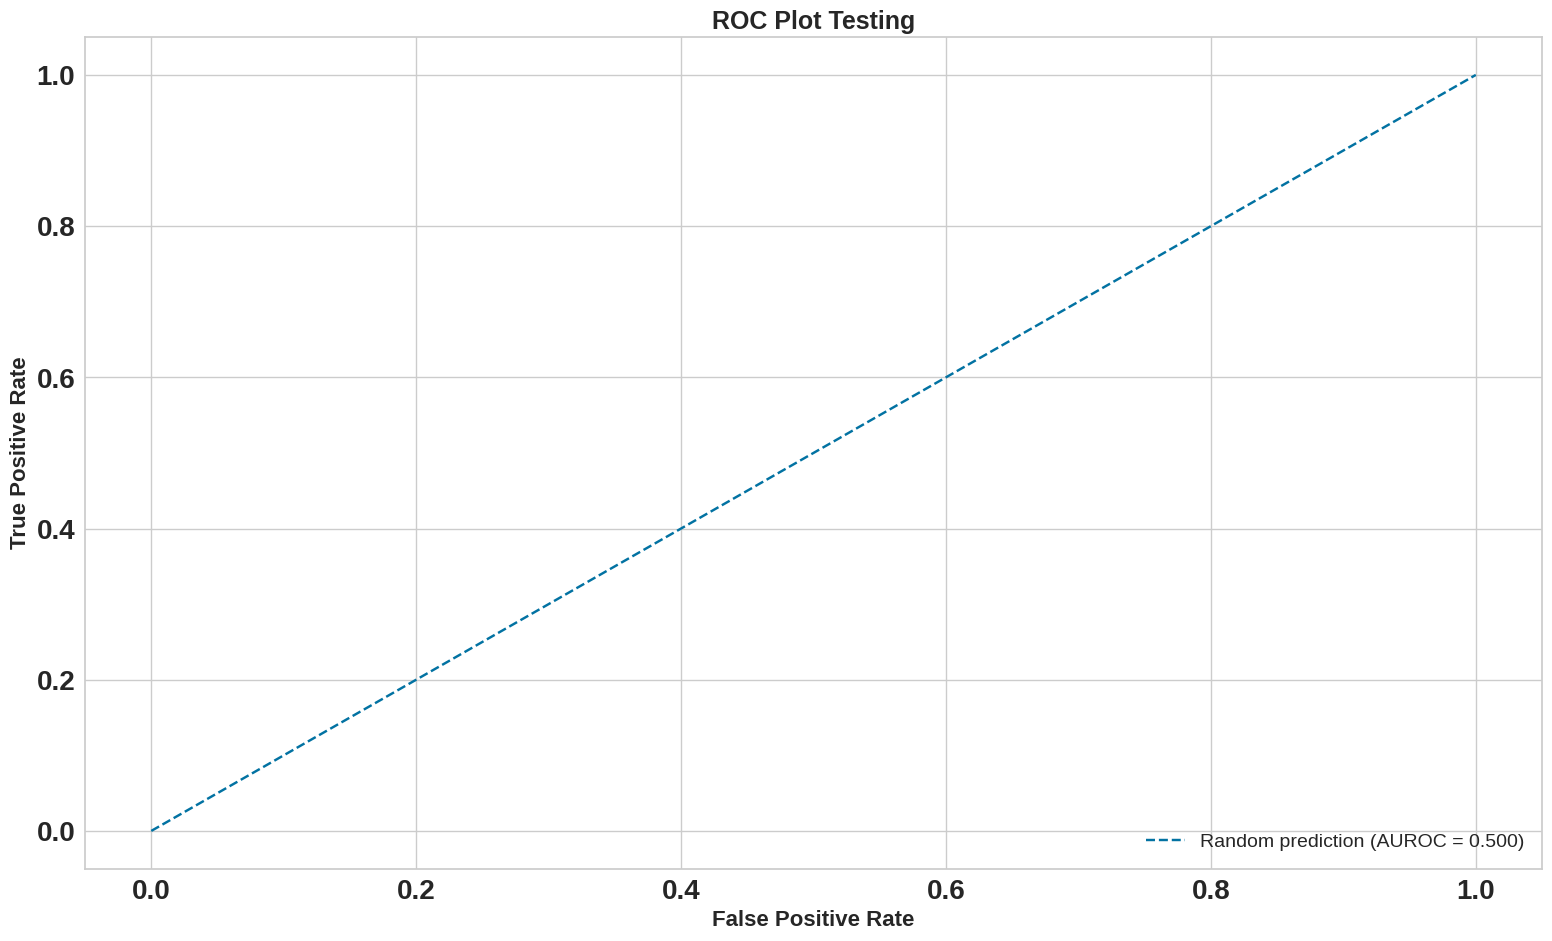

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}


k=10
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  #l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k, scoring=scoring))
  #avg=sum(l)/k
  outcome = cross_validate(i[0],X_new.iloc[:,1:], y_new,cv=k, scoring=scoring)
  #print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print(i[0], outcome)
  print("--------------------------------------------------------------------------")

In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend(
           prop = {'size' : graph_feat["legend Font Size"]},
           loc = graph_feat["legend Position"])
  plt.xticks(fontsize=20, weight = 'bold')
  plt.yticks(fontsize=20, weight = 'bold')
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=10

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],10,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

# **LIME**

In [ ]:
!pip install lime

In [ ]:

def LIME_EXP(model,row):
  import lime
  from lime import lime_tabular


  if str(model)[:3] == "XGB":

    '''
    explainer = lime.lime_tabular.LimeTabularExplainer(
      X_train.values,
      feature_names=list(list(X_new.columns)),
      class_names=['Reading', 'Resting', 'Walking', 'Working']
      )

    exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                model.predict_proba,
                                num_features=6,
                                top_labels=2)'''
    print("Plz RUN XGboost cell....")
    return None

  else:
    explainer = lime_tabular.LimeTabularExplainer(
      training_data=np.array(X_train),
      feature_names=list(X_new.columns),
      class_names=['Control', 'Tinnitus'],
      mode='classification'
      )

    exp = explainer.explain_instance(X_test.iloc[row],
                                    model.predict_proba,
                                    num_features=6,
                                    top_labels=4)



  #exp.show_in_notebook(show_table=True, show_all=True)
  exp.show_in_notebook(show_table=True)


  import matplotlib.pyplot as plt
  with plt.style.context("ggplot"):
      exp.as_pyplot_figure()


  from IPython.display import HTML
  html_data = exp.as_html()
  HTML(data=html_data)

  exp.save_to_file(str(model)+".html")

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME

In [ ]:

new_keys_8=models_check_box(models)

In [ ]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

### LIME for XGboost

In [ ]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Control', 'Tinnitus'])

####Default

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_deafult.html")

####Best Max Depth

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_depth.html")

####Best N Estimator

In [ ]:


exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_estimator.html")

####Best Depth and Best Estimator

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file("xgb_all.html")